In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data=pd.read_csv('/home/dell/python_machine_learning/disease/csv/kidney.csv')

In [5]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

# Mapping the text to 1/0 and cleaning the dataset 

In [7]:

data[['htn','dm','cad','pe','ane']] = data[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})

data[['rbc','pc']] = data[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})

data[['pcc','ba']] = data[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
data[['appet']] = data[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
data['classification'] = data['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
data.rename(columns={'classification':'class'},inplace=True)

data['pe'] = data['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
data['appet'] = data['appet'].replace(to_replace='no',value=0)
data['cad'] = data['cad'].replace(to_replace='\tno',value=0)
data['dm'] = data['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
data.drop('id',axis=1,inplace=True)

In [8]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [9]:
data = data.dropna(axis = 0)

In [10]:
x=data.iloc[:,:-1]
y=data['class']

In [11]:
x.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,...,9.5,29,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0
11,63.0,70.0,1.010,3.0,0.0,1.0,1.0,1.0,0.0,380.0,...,10.8,32,4500,3.8,1.0,1.0,0.0,0.0,1.0,0.0
14,68.0,80.0,1.010,3.0,2.0,0.0,1.0,1.0,1.0,157.0,...,5.6,16,11000,2.6,1.0,1.0,1.0,0.0,1.0,0.0
20,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,173.0,...,7.7,24,9200,3.2,1.0,1.0,1.0,0.0,1.0,1.0


In [12]:
y.head()

3     1.0
9     1.0
11    1.0
14    1.0
20    1.0
Name: class, dtype: float64

# Logistic Regression 

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
y_pred = classifier.predict(x_test)

In [17]:
print(y_pred)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]


In [18]:
print(y_test)

48     1.0
251    0.0
351    0.0
358    0.0
271    0.0
360    0.0
359    0.0
380    0.0
344    0.0
320    0.0
157    1.0
383    0.0
171    1.0
267    0.0
301    0.0
327    0.0
369    0.0
329    0.0
384    0.0
263    0.0
252    0.0
210    1.0
266    0.0
58     1.0
246    1.0
226    1.0
335    0.0
130    1.0
386    0.0
343    0.0
258    0.0
261    0.0
93     1.0
370    0.0
374    0.0
147    1.0
321    0.0
277    0.0
348    0.0
323    0.0
Name: class, dtype: float64


In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [20]:
cm

array([[30,  0],
       [ 0, 10]])

In [21]:
accuracy_score(y_pred,y_test)

1.0

# Decision Tree


In [22]:
from sklearn import tree
from sklearn import metrics

In [23]:
features=['age','bp','sg','al','su','rbc','pc','pcc','ba','bgr']

In [24]:
x= data[features] # Features
y =data['class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

In [26]:
clf = tree.DecisionTreeClassifier()

In [27]:
clf = clf.fit(X_train,y_train)

In [28]:
y_pred = clf.predict(X_test)

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [32]:
from sklearn.externals.six import StringIO  
from IPython.display import Image 
import pydotplus


clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('kidney_disease.png')
Image(graph.create_png())
plt.show()

Accuracy: 1.0


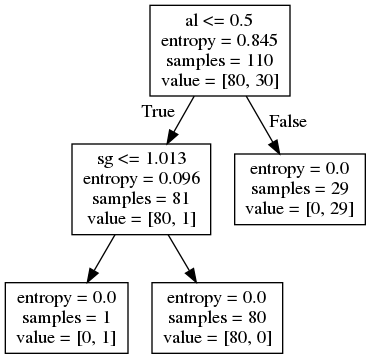

In [33]:
dot_data=StringIO()
tree.export_graphviz(clf,out_file=dot_data,feature_names=features)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# KMeans

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


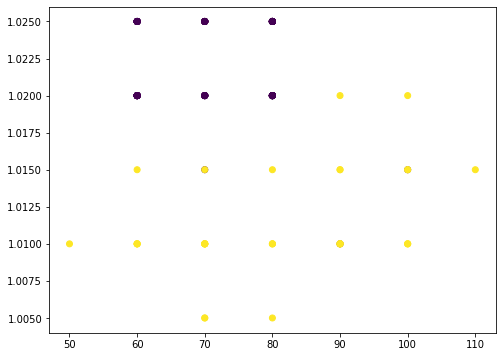

In [34]:
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from numpy import random,float

dt=data[['bp','sg']]
model=KMeans(n_clusters=2)

#Note scaling the data to normalize it! important for good results.

model=model.fit(scale(data))

#we can look at the clusters each data point was assigned to
print(model.labels_)

#and we will visualize it

plt.figure(figsize=(8,6))
plt.scatter(dt['bp'],dt['sg'],c=model.labels_.astype(float))

plt.show()